# 4(2)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def relaxation_time(k_total):
    # Set the rate parameter (λ)
    lambda_param = k_total
    # Generate a random number
    random_number = np.random.exponential(scale=1/lambda_param)
    return random_number


In [29]:
k1,k2,k3=100,0.01,1
gamma1 = 10

In [30]:
state={'m':0,'n':0}
time_trace=[0]
time_duration=0
m_num=[0]
n_num=[0]
for i in range(10000000):
    if state['m']>=3:
        path1 = k2*state['m']*(state['m']-1)*(state['m']-2)*(state['m']-3)
    else:
        path1 = 0
    path2 = k3*state['n']
    path3 = gamma1*state['m']
    path4 = k1
    k_tot=path1+path2+path3+path4
    time_duration+=relaxation_time(k_tot)
    time_trace.append(time_duration)
    lucky_num = np.random.uniform(0,1)
    if lucky_num < path1/k_tot:
        state['m']-=4
        state['n']+=1
    elif path1/k_tot <= lucky_num < (path1+path2)/k_tot:
        state['m']+=4
        state['n']-=1
    elif (path1+path2)/k_tot <= lucky_num < (path1+path2+path3)/k_tot:
        state['m']-=1
    else: 
        state['m']+=1
    m_num.append(state['m'])
    n_num.append(state['n'])

Text(0, 0.5, 'number of molecules')

C:\Users\zyan\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\zyan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


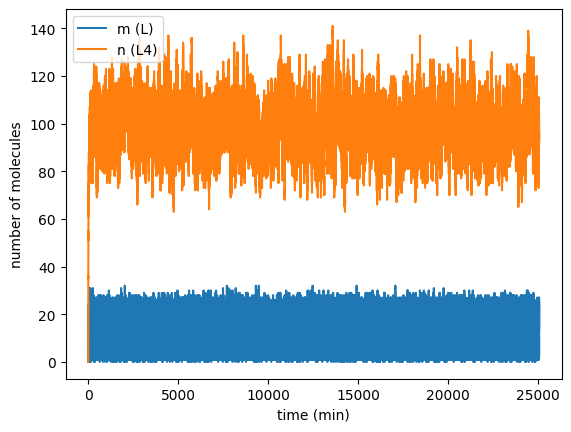

In [31]:
plt.plot(time_trace,m_num,label='m (L)')
plt.plot(time_trace,n_num,label='n (L4)')
plt.legend()
plt.xlabel('time (min)')
plt.ylabel('number of molecules')

## m 均值 (L)

In [34]:
np.mean(m_num[:1000000])

11.252626

## n 均值 (L4)

In [35]:
np.mean(n_num[:1000000])

100.520584